# COVID-19 Data Visualization
Amid the current Corona virus pandemic, I decided to work in Python and visualize data. 

### Motivation/Why
With Coronavirus constantly spreading, I wanted to visualize the data that is coming out to help comprehend everything that is going on. 

Unfortunatly, data is not very accurate. Governments are releasing data at different rates, not enough testing is being done to give us an accurate estimate of how many cases do not show any symptoms, and testing figures are not being released to compare positive and negative results. 

As of writing, the date is April. 6, 2020. 

### Gathering Data
Data scraped from https://www.worldometers.info/coronavirus using Beautiful Soup HTML parser.

In [1]:
# current cases data
# import libraries 
import requests
from bs4 import BeautifulSoup

# read page
url = "https://www.worldometers.info/coronavirus/"

# parsed page
soup = BeautifulSoup(requests.get(url).text, 'html.parser')

# get and print time of last execution
import datetime
date = datetime.datetime.now()
print ("Data last gathered on: ")
print (date.strftime("%Y-%m-%d %H:%M:%S") + " Last cell execution")

Data last gathered on: 
2020-04-10 19:05:40 Last cell execution


## Parsing Data

### Current Cases
Data parsed includes: 
- Cases
- Deaths
- Recoveries
- Active Cases
- Closed Cases


In [2]:
# counters 
counters = soup.body.find_all('div', attrs={'class': 'maincounter-number'})

# cases
cases = counters[0]
cases = int(cases.span.text.replace(",", "")) # get data from span, replace characters, convert to int 
# print(type(cases))
print("Total number of worldwide cases:", cases)

# deaths
deaths = counters[1]
deaths = int(deaths.span.text.replace(",", "")) # get data from span, replace characters, convert to int 
print("Total number of worldwide deaths:", deaths)

# recoveries
recoveries = counters[2]
recoveries = int(recoveries.span.text.replace(",", "")) # get data from span, replace characters, convert to int 
print("Total number of worldwide recoveries:", recoveries)

# current outcomes 
outcomes = soup.body.find_all('div', attrs={'class': 'number-table-main'})

# active cases
active_cases = outcomes[0]
active_cases = int(active_cases.text.replace(",", ""))
print("Total number of active cases:", active_cases)

# closed cases
closed_cases = outcomes[1]
closed_cases = int(closed_cases.text.replace(",", ""))
print("Total number of closed cases:", closed_cases)

Total number of worldwide cases: 1680506
Total number of worldwide deaths: 101762
Total number of worldwide recoveries: 373575
Total number of active cases: 1205169
Total number of closed cases: 475337


### Historical Patterns
Parsing a CSV file with data from Johns Hopkins University Center for Systems Science and Engineering (CSSE). 

Data is available from Github repository: https://github.com/datasets/covid-19

Worldwide Aggregated Data available here: https://github.com/datasets/covid-19/blob/master/data/worldwide-aggregated.csv

Data Gathered: 
- Date
- Number of Days
- Confirmed Cases Historical
- Recoveries Historical
- Deaths Historical
- Increase Rate Historical


In [3]:
# downloading data from github repository with csv
import pandas as pd
import numpy as np

url = "https://raw.githubusercontent.com/datasets/covid-19/master/data/worldwide-aggregated.csv"
df = pd.read_csv(url, names=["Date", "Confirmed", "Recovered", "Deaths", "Increase rate"], na_values=['NaN'], skiprows=2)
# df = pd.read_csv("/content/test.csv", names=["Date", "Confirmed", "Recovered", "Deaths", "Increase rate"])
print("Gathered data:")
print(df.head())
# print(df.dtypes)

# gather confirmed, recovered, deaths, increase rate
date = df["Date"].values
days = np.ones(len(df["Date"]))
for i in range(len(df["Date"])):
  days[i] = i + 1

confirmed_historical = df["Confirmed"].values
recoveries_historical = df["Recovered"].values
deaths_historical = df["Deaths"].values
increaserate_historical = df["Increase rate"].values

# print(type(confirmed_historical))

print('\n')

# print last cell execution: 
import datetime
date = datetime.datetime.now()
print ("Data last gathered on: ")
print (date.strftime("%Y-%m-%d %H:%M:%S") + " Last cell execution")

Gathered data:
         Date  Confirmed  Recovered  Deaths  Increase rate
0  2020-01-23        654         30      18      17.837838
1  2020-01-24        941         36      26      43.883792
2  2020-01-25       1434         39      42      52.391073
3  2020-01-26       2118         52      56      47.698745
4  2020-01-27       2927         61      82      38.196412


Data last gathered on: 
2020-04-10 19:05:40 Last cell execution


## Graphing the Data


#### All Cases 
- Comparing closed cases with current cases to get a figure on the percentage of deaths and recoveries. 

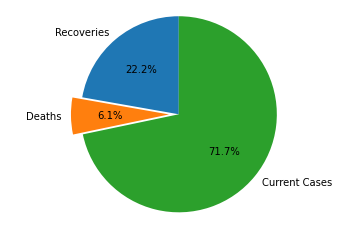

In [4]:
# libraries
import matplotlib.pyplot as plt

labels = 'Recoveries, Deaths, Cases'

current = cases - deaths - recoveries  # subtract closed cases to get current 

labels = 'Recoveries', 'Deaths', 'Current Cases'
sizes = [recoveries, deaths, current]

figallcases, axallcases = plt.subplots()
axallcases.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=90, explode=(0, 0.1, 0))
axallcases.axis('equal')
plt.savefig("allcases.png")
plt.show()

#### Closed Cases
- Comparing deaths and recoveries in closed cases. 

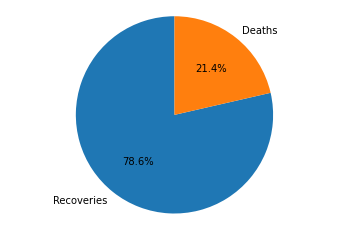

In [5]:
labels = 'Recoveries', 'Deaths'
sizes = [recoveries, deaths]

figclosedcases, axclosedcases = plt.subplots()
axclosedcases.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=90)
axclosedcases.axis('equal')
plt.savefig("closedcases.png")
plt.show()

### General Increase in Cases

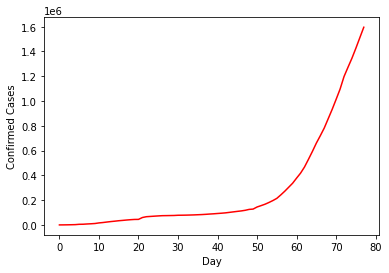

In [6]:
# graph 
plt.plot(confirmed_historical, color="red")
plt.ylabel("Confirmed Cases")
plt.xlabel("Day")
plt.savefig("generalincrease.png")
plt.show()

### Increase Rate
- How the increase rate has changed over the course of the virus

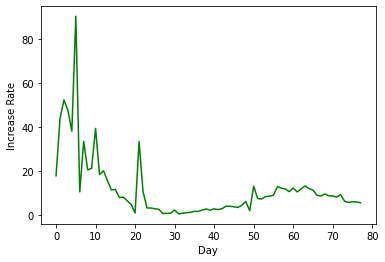

In [7]:
plt.plot(increaserate_historical, color="green")
plt.ylabel("Increase Rate")
plt.xlabel("Day")
plt.savefig("increaserate.png")
plt.show()

### Stacked Chart
- Comparing total cases with recoveries and deaths

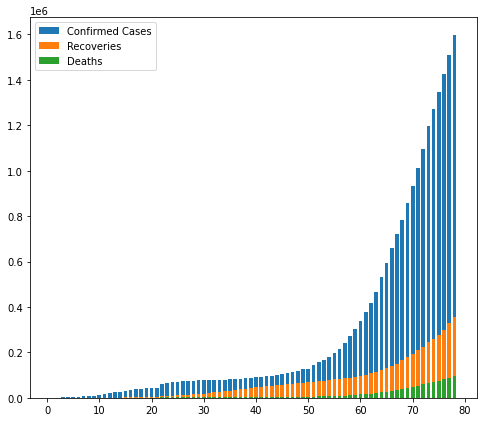

In [8]:
figstackedchart = plt.figure(figsize=(8, 7))

p1 = plt.bar(days, confirmed_historical,0.7)
p2 = plt.bar(days, recoveries_historical, 0.7)
p3 = plt.bar(days, deaths_historical, 0.7)

plt.legend((p1[0], p2[0], p3[0]), ('Confirmed Cases', 'Recoveries', 'Deaths'))
plt.savefig("stackedchart.png")
plt.show()

### 3D Model
- Comparing cases to day and daily increase rate
- 3D Scatterplot
- 3D Bar Graph

#### 3D Scatterplot

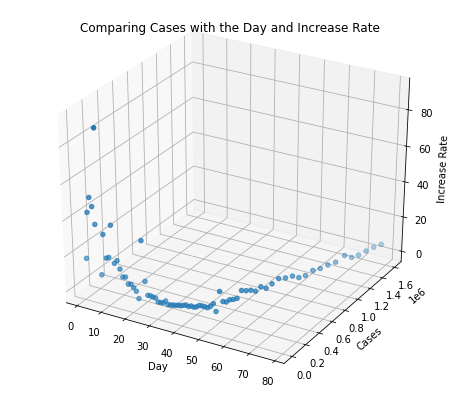

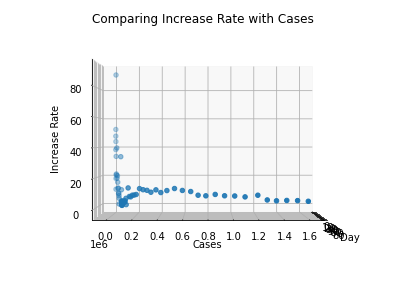

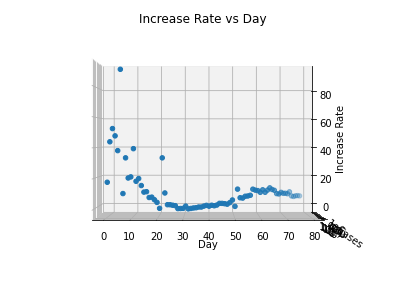

In [9]:
def scatterplot(elem, azim, title, fig1=8, fig2=7):
  figscatterplot = plt.figure(figsize=(fig1, fig2))
  axscatterplot = figscatterplot.add_subplot(111, projection='3d')

  x = days
  z = increaserate_historical
  y = confirmed_historical

  axscatterplot.set_title(title)

  axscatterplot.set_xlabel('Day')
  axscatterplot.set_ylabel('Cases')
  axscatterplot.set_zlabel('Increase Rate')

  axscatterplot.scatter(x, y, z)

  axscatterplot.view_init(elem, azim)
  plt.savefig("3dscatterplot." + str(elem) + "." + str(azim) + ".png")
  plt.show()

scatterplot(None, None, "Comparing Cases with the Day and Increase Rate")
scatterplot(0, 0, "Comparing Increase Rate with Cases", 7, 5)
scatterplot(0, 270, "Increase Rate vs Day", 7, 5)

#### 3D Bar Graph

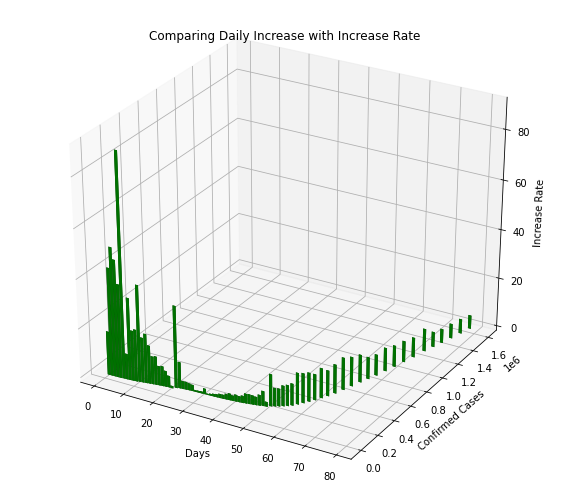

In [10]:
# bar graph
fig3dbargraph = plt.figure(figsize=(8, 7))
ax3dbargraph = plt.axes(projection="3d")

x = days
y = confirmed_historical
z = np.zeros(len(days))

dx = np.ones(len(days))
dy = np.ones(len(days))
dz = increaserate_historical

ax3dbargraph.bar3d(x, y, z, dx, dy, dz, color='g')

ax3dbargraph.set_xlabel('Days')
ax3dbargraph.set_ylabel('Confirmed Cases')
ax3dbargraph.set_zlabel('Increase Rate')
plt.title("Comparing Daily Increase with Increase Rate")
plt.tight_layout()
plt.savefig("3dbargraph.png")
plt.show()

## Future Ideas
- Interactive Graph 
- Wireframe Plot

Remember to stay home as much as possible, keep 2 meters (6 feet) distance from anybody to help these figures stay lower and ensure health care systems have hospitals at capacity. 

Ryan Arnouk